<a href="https://colab.research.google.com/github/dpanagop/ML_and_AI_examples/blob/master/Customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load pandas, numpy, seaborn, matplotlib and scipy.stats libraries

In [0]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Load and examine data from UCI website 

In [0]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
dat=pd.read_csv(url)

###Examine first rows of dataset

In [3]:
dat.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


###With *info* command, we can see the types of our variables and the number of completed records for each one of them

In [4]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


###while with *describe* command, we calculate the basic statistics for our variables

In [5]:
dat.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


#Preprocessing

###The following code snippet, detects for every variable the records that lie beyond 4 sds from the mean
###It is a common practise to omit these records when clustering as outliers/extreme cases

In [6]:
headers=[ 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']
outliers=[]
for hd in headers:
  z=np.abs(stats.zscore(dat[hd]))
  id=np.where(z>4)
  print("outliers for ",hd,":", id)
  outliers=np.union1d(outliers,id[0])
  print("new outliers are ",outliers)


outliers for  Fresh : (array([125, 181, 284]),)
new outliers are  [125. 181. 284.]
outliers for  Milk : (array([ 23,  47,  61,  85,  86, 183]),)
new outliers are  [ 23.  47.  61.  85.  86. 125. 181. 183. 284.]
outliers for  Grocery : (array([ 47,  61,  85, 333]),)
new outliers are  [ 23.  47.  61.  85.  86. 125. 181. 183. 284. 333.]
outliers for  Frozen : (array([ 93, 183, 325]),)
new outliers are  [ 23.  47.  61.  85.  86.  93. 125. 181. 183. 284. 325. 333.]
outliers for  Detergents_Paper : (array([ 47,  61,  65,  85, 333]),)
new outliers are  [ 23.  47.  61.  65.  85.  86.  93. 125. 181. 183. 284. 325. 333.]
outliers for  Delicassen : (array([ 23,  71,  87, 183]),)
new outliers are  [ 23.  47.  61.  65.  71.  85.  86.  87.  93. 125. 181. 183. 284. 325.
 333.]


In [0]:
dat=dat.drop(dat.index[outliers.astype(int)])

#Hierachical clustering

###First all the variables are normalised. These prevents differences in scale from messing up our clustering

In [0]:
#First,load preprocessing from sklearn
from sklearn import preprocessing
x = dat.values
min_max_scaler = preprocessing.StandardScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled,columns=dat.columns)

###The normalised data look like

In [9]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.465656,0.598855,0.145323,0.906348,0.064647,-0.777870,0.040019,0.049449
1,1.465656,0.598855,-0.381089,0.936993,0.350437,-0.293367,0.213052,0.401536
2,1.465656,0.598855,-0.447125,0.737604,0.082162,-0.092116,0.275389,5.279311
3,-0.682288,0.598855,0.201229,-0.777117,-0.410958,1.159518,-0.565738,0.411183
4,1.465656,0.598855,1.078270,0.061432,0.012957,0.380494,-0.210726,3.141868


###Next we create and display a dendrogram. It is clear that there exist 2 groups, colored with green and red.

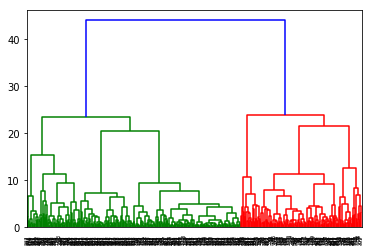

In [10]:
#Load scipy.cluster.hierarchy
import scipy.cluster.hierarchy as hc
dend = hc.dendrogram(hc.linkage(df, method='ward'))
#plt.axhline can be used to display a horizontal line at a specific height
#plt.axhline(y=6, color='r', linestyle='--')

In [11]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(df)

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,

###After performing a hierarchical clustering with 2 groups, we can profile each group.
###A way to do this is to create scatterplots where datapoints from the two groups are displayed with differen colors.
###For example, delw we create a scatterplot for variables Milk and Grocery.

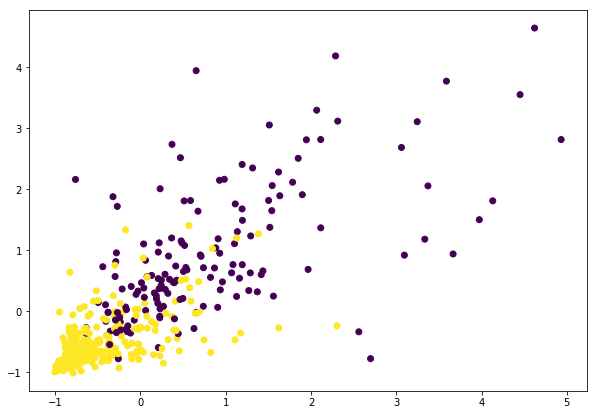

In [12]:
plt.figure(figsize=(10, 7))  
plt.scatter(df['Milk'], df['Grocery'], c=cluster.labels_) 

#K-means
###Before applying k-means, we should point out that it is good practise to disregard highly correlated variables when clustering. This is because their importance will be hightened if we include all of them.
###The same applies to categorical data, hence we will omit Region and Channel varaiables. 
###The correlations plot below, shows that Milk is highly correlated with both Grocery and Detergents_Paper. We will exclude the last two from our clusterin data. 

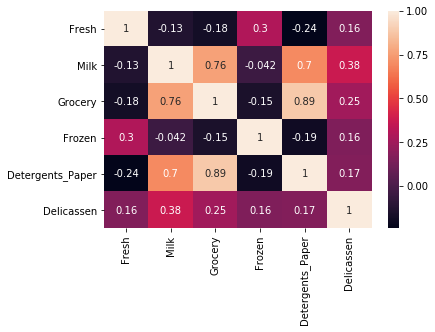

In [13]:
corr = dat.iloc[:,2:8].corr()
#corr.style.background_gradient(cmap='coolwarm').set_precision(2)
sns.heatmap(corr, annot = True)

In [0]:
#Exclude Region, Channel, Groceries and Detergents_Paper variables from df dataframe
df2=df.iloc[:,[2,3,5,7]]

###To perform k-means clusterring, firstly we load the necessary libraries

In [0]:
from sklearn.cluster import KMeans

###One critical decision is the number of clusters that k-means will create. For this we use the **elbow method**.
###For this, we apply k-means and create clustering solutions for 2,3,..,10 clusters.
###Then we plot the sum of squared distances of data to their closest cluster center 
###According to the elbow method the best number of clusters is where an elbow appears at the graph.

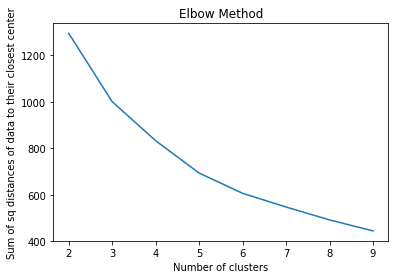

In [16]:
wcss = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df2)
    wcss.append(kmeans.inertia_)
plt.plot(range(2, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of sq distances of data to their closest center')
plt.show()

###Unfortunatelly, the best number of clusters is not clear from the results of the elbow method. Possible candidates are 3, 5 and 6.
###Normaly, we would test all the above by profilling the clusters and making a business driven decission.
###For our purposes, we will examine only the slution with 3 groups.

In [17]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

###In ordder to best understand the clusters, we append a column indicating the cluster of each record to the non-ormalised data set.

In [18]:
dat['cluster']=kmeans.labels_
dat.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,2
4,2,3,22615,5410,7198,3915,1777,5185,1


###Display clusters' size and median for variables Fresh, Milk, Fresh, Frozen and Delicassen

In [40]:
print('Records per cluster')
#dat.groupby('cluster')['cluster'].count()
dat.groupby('cluster').agg({"cluster":"count",
                            "Fresh":"median","Milk":"median","Fresh":"median","Frozen":"median","Fresh":"median","Delicassen":"median"})

Records per cluster


,cluster,Fresh,Milk,Frozen,Delicassen
cluster,,,,,
0,269,6211,2521,1069,654
1,75,6134,11093,1535,2563
2,81,23632,2770,6422,1365


###Create a barplot dispalying number of records for each Channel per cluster 

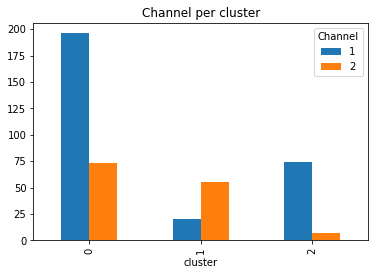

In [71]:
dat_agg=dat.groupby(['cluster','Channel']).count() #agg({"cluster":"median"})
dat_agg['Frozen'].unstack().plot(kind='bar',title='Channel per cluster')

###Create a barplot dispalying number of records for each Region per cluster

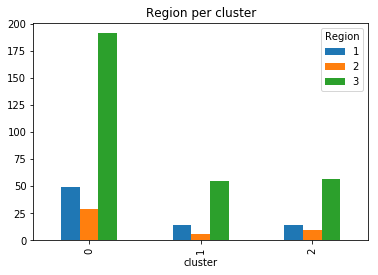

In [72]:
dat_agg=dat.groupby(['cluster','Region']).count() #agg({"cluster":"median"})
dat_agg['Frozen'].unstack().plot(kind='bar',title='Region per cluster')